In [1]:
import pandas as pd

In [12]:
pd.read_csv('exoplanet_data_normalized.csv')

,Orbital_Period,Planetary_Radius
0,0.016440,0.839094
1,0.030736,0.837353
2,0.014012,0.753645
3,0.026453,0.956631
4,0.020017,0.716593
...,...,...
195,0.946715,0.160257
196,0.965011,0.211557
197,0.856437,0.119400
198,0.982099,0.194506


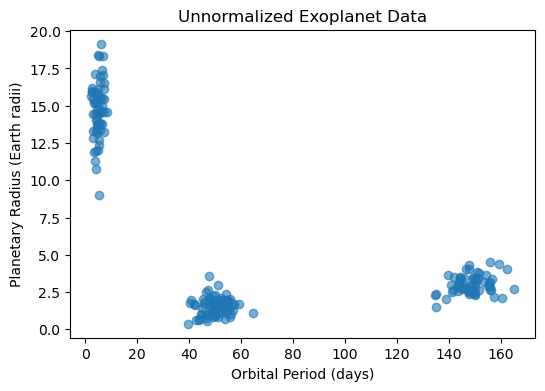

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original data
df_original = pd.read_csv('exoplanet_data_original.csv')

# Plot unnormalized data
plt.figure(figsize=(6, 4))
plt.scatter(df_original['Orbital_Period'], df_original['Planetary_Radius'], alpha=0.6)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planetary Radius (Earth radii)')
plt.title('Unnormalized Exoplanet Data')
plt.show()

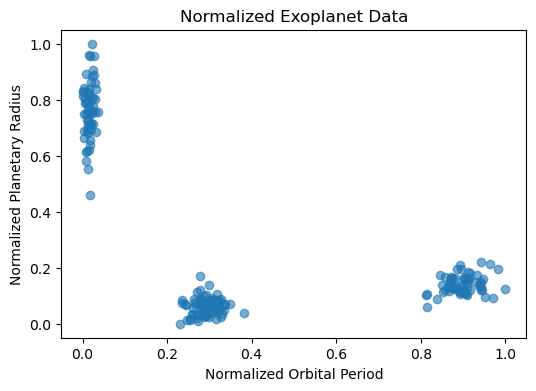

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load normalized data
df_normalized = pd.read_csv('exoplanet_data_normalized.csv')

# Plot normalized data
plt.figure(figsize=(6, 4))
plt.scatter(df_normalized['Orbital_Period'], df_normalized['Planetary_Radius'], alpha=0.6)
plt.xlabel('Normalized Orbital Period')
plt.ylabel('Normalized Planetary Radius')
plt.title('Normalized Exoplanet Data')
plt.show()

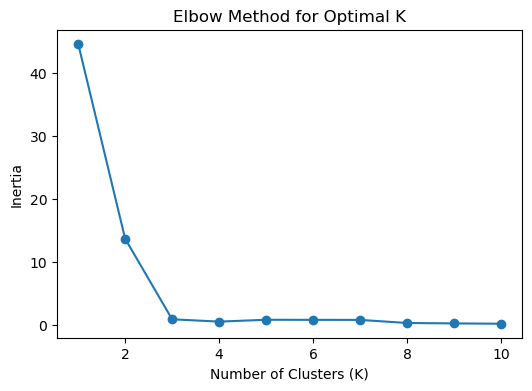

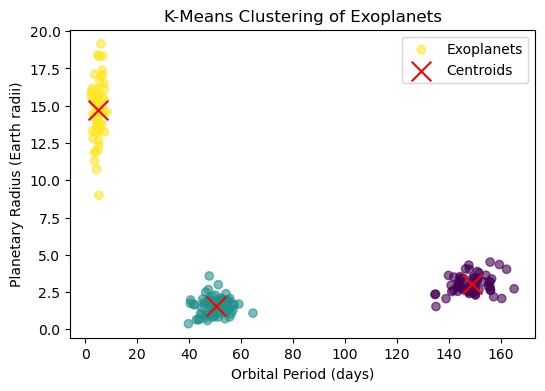

Centroids (Orbital Period, Planetary_Radius):
Cluster 0: Period = 148.63 days, Radius = 3.02 Earth radii
Cluster 1: Period = 50.16 days, Radius = 1.55 Earth radii
Cluster 2: Period = 4.91 days, Radius = 14.73 Earth radii


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load normalized data from CSV
df_normalized = pd.read_csv('exoplanet_data_normalized.csv')
X_normalized = df_normalized[['Orbital_Period', 'Planetary_Radius']].to_numpy()

# Load original data from CSV for plotting
df_original = pd.read_csv('exoplanet_data_original.csv')
X = df_original[['Orbital_Period', 'Planetary_Radius']].to_numpy()

# Fit scaler on original data for denormalization
scaler = MinMaxScaler()
scaler.fit(X)  # Fit scaler to original data

# K-Means functions from your notebook
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:  # Avoid division by zero
            centroids[k] = np.mean(points, axis=0)
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

# Elbow method to find optimal K
inertias = []
K_range = range(1, 11)
for K in K_range:
    # Randomly initialize centroids
    initial_centroids = X_normalized[np.random.choice(X_normalized.shape[0], K, replace=False)]
    centroids, idx = run_kMeans(X_normalized, initial_centroids, max_iters=10)
    # Compute inertia (sum of squared distances to closest centroid)
    inertia = 0
    for i in range(X_normalized.shape[0]):
        inertia += np.linalg.norm(X_normalized[i] - centroids[idx[i]]) ** 2
    inertias.append(inertia)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Choose K=3 based on elbow method (assuming elbow at K=3)
K = 3
initial_centroids = X_normalized[np.random.choice(X_normalized.shape[0], K, replace=False)]
centroids, idx = run_kMeans(X_normalized, initial_centroids, max_iters=10)

# Denormalize centroids for interpretation
centroids_denorm = scaler.inverse_transform(centroids)

# Plot clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', alpha=0.6, label='Exoplanets')
plt.scatter(
    centroids_denorm[:, 0], centroids_denorm[:, 1], c='red', marker='x', s=200, label='Centroids'
)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planetary Radius (Earth radii)')
plt.title('K-Means Clustering of Exoplanets')
plt.legend()
plt.show()

# Interpret clusters
print("Centroids (Orbital Period, Planetary_Radius):")
for i, centroid in enumerate(centroids_denorm):
    print(f"Cluster {i}: Period = {centroid[0]:.2f} days, Radius = {centroid[1]:.2f} Earth radii")